# $2 \times 2$ UT-Multiplier

This is a `10`-qubit circuit.

In [1]:
from qiskit import *

***

First we build a `half_adder` and `full_adder` using DraperQFT Adder Circuits.

`half_adder`

In [2]:
from qiskit.circuit.library import DraperQFTAdder

In [3]:
draper = DraperQFTAdder(1, kind = 'half')
ha = draper.to_gate(label = '1-bit DQFT Adder')

`ha` is 1-qubit Half-Adder.

***

Building the Circuit

In [4]:
inp = QuantumRegister(4, 'input')
out = QuantumRegister(6, 'output')
cbit = ClassicalRegister(4, 'cbits')
multiplier = QuantumCircuit(inp, out, cbit)

In [5]:
# taking input

for i in range(4) :
    multiplier.x(inp[i])

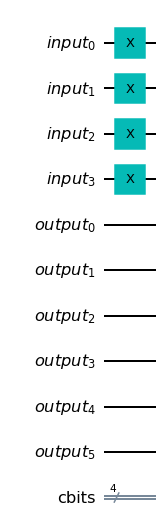

In [6]:
multiplier.draw('mpl')

In [7]:
# AND operations

multiplier.barrier()
multiplier.ccx(inp[0], inp[2], out[0])
multiplier.ccx(inp[0], inp[3], out[1])
multiplier.ccx(inp[1], inp[2], out[2])
multiplier.ccx(inp[1], inp[3], out[3])
multiplier.barrier()

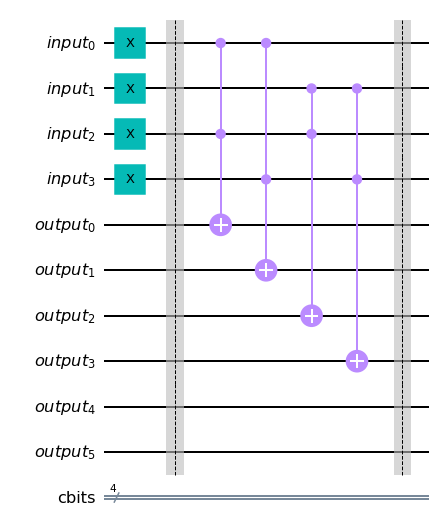

In [8]:
multiplier.draw('mpl')

In [9]:
# Additions

multiplier.append(ha, [out[1], out[2], out[4]])
multiplier.append(ha, [out[3], out[4], out[5]])
multiplier.barrier()

# output on : 0, 2, 4, 5

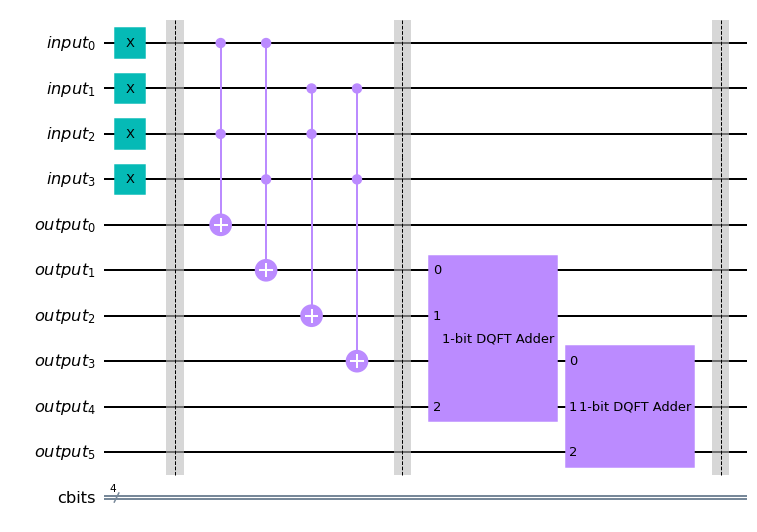

In [10]:
multiplier.draw('mpl')

In [11]:
# adding measure gates
multiplier.measure(out[0], cbit[0])
multiplier.measure(out[2], cbit[1])
multiplier.measure(out[4], cbit[2])
multiplier.measure(out[5], cbit[3])

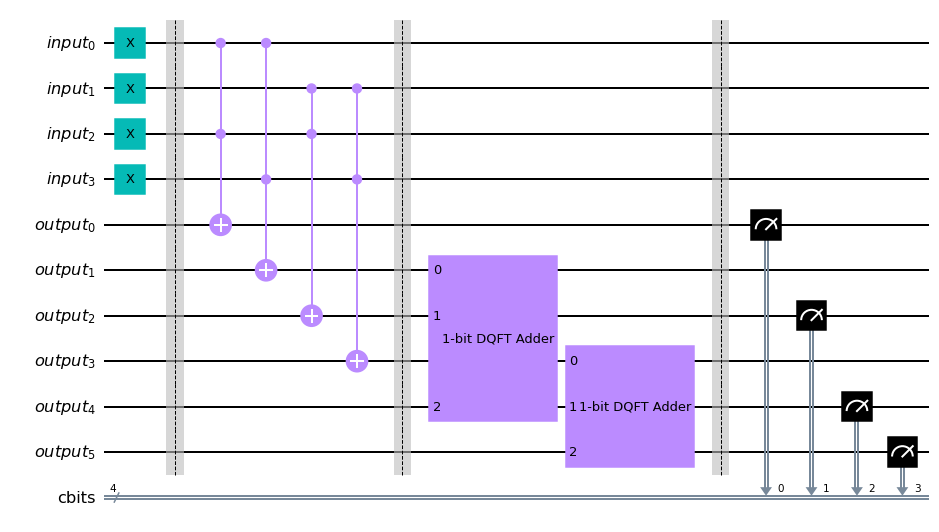

In [12]:
multiplier.draw('mpl')

***

After building the circuit, we simulate it.

In [13]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(multiplier, simulator).result()

In [14]:
from qiskit.visualization import plot_histogram

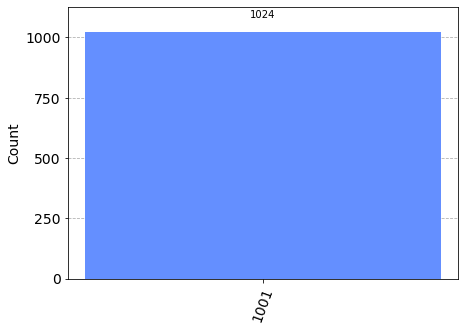

In [15]:
counts = result.get_counts()
plot_histogram(counts)

***

SIMULATIONS on UT-Multiplier

***

V1 Backends :

CAIRO

In [16]:
from qiskit.providers.fake_provider import FakeCairo
from qiskit.providers.aer import AerSimulator

In [17]:
# simulating the circuit on a fake simulator

cairo = FakeCairo()
simulator = AerSimulator.from_backend(cairo)

C:\Users\ASHU\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (210788.50669687917 > 2 * 104325.12715207216). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\ASHU\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (196328.6961892367 > 2 * 96478.49546055387). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\ASHU\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (210788.50669687917 > 2 * 104325.12715207216). Truncating to maximum value.
  warn("Device model returned 

In [18]:
compiled_circuit = transpile(multiplier, simulator)

In [19]:
%%time

# result = execute(compiled_circuit, simulator, counts = 1024).result()
result = execute(multiplier, simulator, counts = 1024).result()

CPU times: total: 17.3 s
Wall time: 2.02 s


In [20]:
fake_counts = result.get_counts()

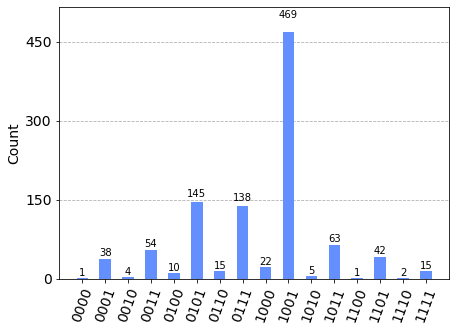

In [21]:
plot_histogram(fake_counts)

***

GUADALUPE

In [22]:
from qiskit.providers.fake_provider import FakeGuadalupe

In [23]:
# simulating the circuit on a fake simulator

guadalupe = FakeGuadalupe()
simulator = AerSimulator.from_backend(guadalupe)

In [24]:
compiled_circuit = transpile(multiplier, simulator)

In [25]:
%%time

# result = execute(compiled_circuit, simulator, counts = 1024).result()
result = execute(multiplier, simulator, counts = 1024).result()

CPU times: total: 56 s
Wall time: 4.01 s


In [26]:
fake_counts = result.get_counts()

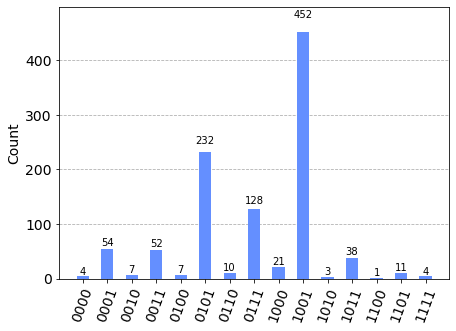

In [27]:
plot_histogram(fake_counts)

***

HANOI

In [28]:
from qiskit.providers.fake_provider import FakeHanoi

In [29]:
# simulating the circuit on a fake simulator

hanoi = FakeHanoi()
simulator = AerSimulator.from_backend(hanoi)

In [30]:
compiled_circuit = transpile(multiplier, simulator)

In [31]:
%%time

# result = execute(compiled_circuit, simulator, counts = 1024).result()
result = execute(multiplier, simulator, counts = 1024).result()

CPU times: total: 31.4 s
Wall time: 2.56 s


In [32]:
fake_counts = result.get_counts()

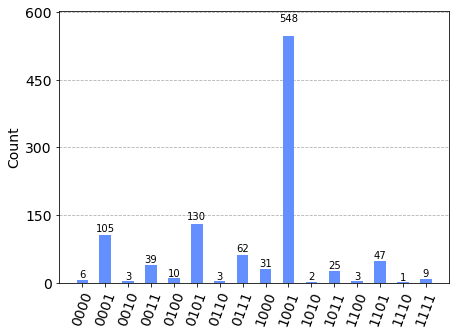

In [33]:
plot_histogram(fake_counts)

***

KOLKATA

In [34]:
from qiskit.providers.fake_provider import FakeKolkata

In [35]:
# simulating the circuit on a fake simulator

kolkata = FakeKolkata()
simulator = AerSimulator.from_backend(kolkata)

C:\Users\ASHU\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (176559.53113137398 > 2 * 82342.07497449027). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\ASHU\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (331690.3162902089 > 2 * 162340.601819872). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\ASHU\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (176559.53113137398 > 2 * 82342.07497449027). Truncating to maximum value.
  warn("Device model returned an 

In [36]:
compiled_circuit = transpile(multiplier, simulator)

In [37]:
%%time

# result = execute(compiled_circuit, simulator, counts = 1024).result()
result = execute(multiplier, simulator, counts = 1024).result()

CPU times: total: 6.38 s
Wall time: 1.2 s


In [38]:
fake_counts = result.get_counts()

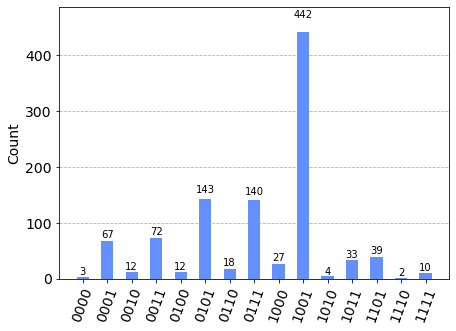

In [39]:
plot_histogram(fake_counts)

***

MELBOURNE

In [40]:
from qiskit.providers.fake_provider import FakeMelbourne

In [41]:
# simulating the circuit on a fake simulator

melbourne = FakeMelbourne()
simulator = AerSimulator.from_backend(melbourne)

In [42]:
compiled_circuit = transpile(multiplier, simulator)

In [43]:
%%time

# result = execute(compiled_circuit, simulator, counts = 1024).result()
result = execute(multiplier, simulator, counts = 1024).result()

CPU times: total: 13.6 s
Wall time: 1.45 s


In [44]:
fake_counts = result.get_counts()

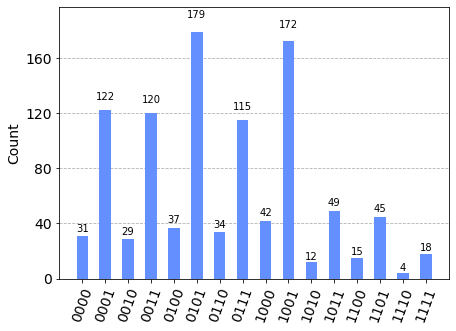

In [45]:
plot_histogram(fake_counts)

***

MONTREAL

In [46]:
from qiskit.providers.fake_provider import FakeMontreal

In [47]:
# simulating the circuit on a fake simulator

montreal = FakeMontreal()
simulator = AerSimulator.from_backend(montreal)

In [48]:
compiled_circuit = transpile(multiplier, simulator)

In [49]:
%%time

# result = execute(compiled_circuit, simulator, counts = 1024).result()
result = execute(multiplier, simulator, counts = 1024).result()

CPU times: total: 30.8 s
Wall time: 3.25 s


In [50]:
fake_counts = result.get_counts()

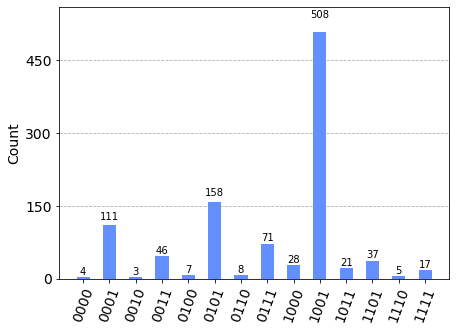

In [51]:
plot_histogram(fake_counts)

***

SYDNEY

In [52]:
from qiskit.providers.fake_provider import FakeSydney

In [53]:
# simulating the circuit on a fake simulator

sydney = FakeSydney()
simulator = AerSimulator.from_backend(sydney)

In [54]:
compiled_circuit = transpile(multiplier, simulator)

In [55]:
%%time

# result = execute(compiled_circuit, simulator, counts = 1024).result()
result = execute(multiplier, simulator, counts = 1024).result()

CPU times: total: 5.17 s
Wall time: 1.11 s


In [56]:
fake_counts = result.get_counts()

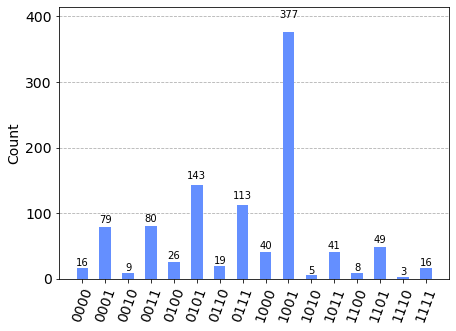

In [57]:
plot_histogram(fake_counts)

***

TOKYO

In [58]:
from qiskit.providers.fake_provider import FakeTokyo

In [59]:
# simulating the circuit on a fake simulator

tokyo = FakeTokyo()
simulator = AerSimulator.from_backend(tokyo)

In [60]:
compiled_circuit = transpile(multiplier, simulator)

In [61]:
%%time

# result = execute(compiled_circuit, simulator, counts = 1024).result()
result = execute(multiplier, simulator, counts = 1024).result()

CPU times: total: 5.05 s
Wall time: 1.35 s


In [62]:
fake_counts = result.get_counts()

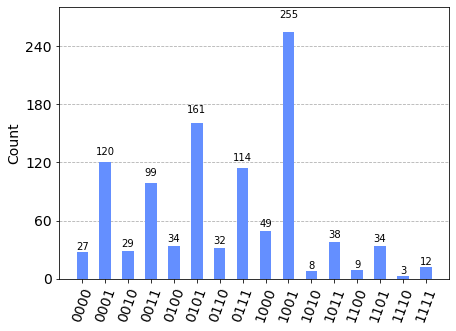

In [63]:
plot_histogram(fake_counts)

***

TORRONTO

In [64]:
from qiskit.providers.fake_provider import FakeToronto

In [65]:
# simulating the circuit on a fake simulator

toronto = FakeToronto()
simulator = AerSimulator.from_backend(toronto)

In [66]:
compiled_circuit = transpile(multiplier, simulator)

In [67]:
%%time

# result = execute(compiled_circuit, simulator, counts = 1024).result()
result = execute(multiplier, simulator, counts = 1024).result()

CPU times: total: 35.8 s
Wall time: 2.52 s


In [68]:
fake_counts = result.get_counts()

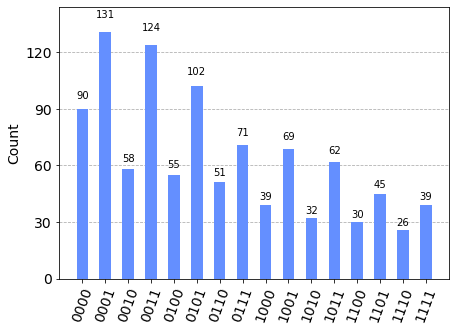

In [69]:
plot_histogram(fake_counts)

***

WASHINGTON

In [70]:
from qiskit.providers.fake_provider import FakeWashington

In [71]:
# simulating the circuit on a fake simulator

washington = FakeWashington()
simulator = AerSimulator.from_backend(washington)

C:\Users\ASHU\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (260581.28986315246 > 2 * 80026.57875131005). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\ASHU\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (115349.1827351713 > 2 * 56743.169831786116). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\ASHU\anaconda3\lib\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (260581.28986315246 > 2 * 80026.57875131005). Truncating to maximum value.
  warn("Device model returned a

In [72]:
compiled_circuit = transpile(multiplier, simulator)

In [73]:
%%time

# result = execute(compiled_circuit, simulator, counts = 1024).result()
result = execute(multiplier, simulator, counts = 1024).result()

CPU times: total: 7 s
Wall time: 2.81 s


In [74]:
fake_counts = result.get_counts()

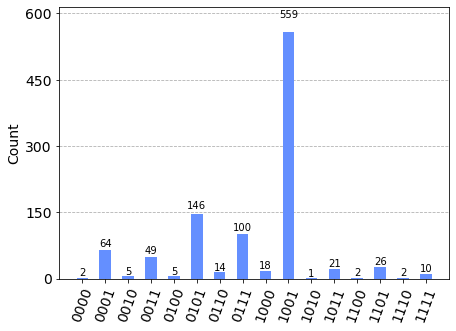

In [75]:
plot_histogram(fake_counts)